#  *Done by TAFZA Hanae*
# *Major: ICSD*
# *Year:2023*

# <font color="red">**Theme**:</font> Health Care</font>

z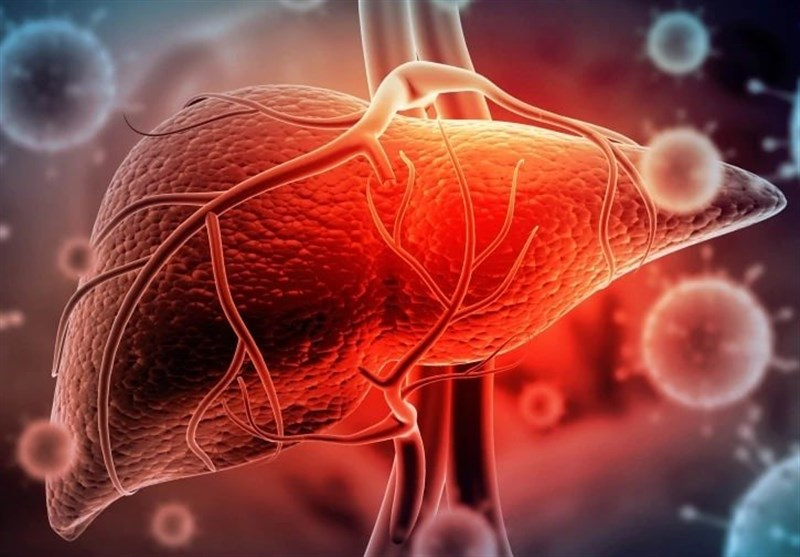

# <font color="red">**Introduction** </font>

# <font color="red">**As hepatocellular carcinoma**</font>  is one of the most common liver cancer deaths in the world, it is prevalent in Asian and African countries. It is estimated that the survival rate can be increased with early detection, so it is important to predict the selected characteristics to avoid this disease.

# **<font color="red">Goal:</font>**
**Our Goal is to achieve the highest accurate model in order to increase survival rates of the patients**

# <font color="red">**Columns description**</font>

**Description of columns**
*  Class: 0 died, 1 lived
*  Gender: The gender of the patient (0 = male, 1 = female).
*  Symptoms: The presence or absence of symptoms (0 = no symptoms, 1 = symptoms present).
*  Alcohol: The amount of alcohol consumption per day in grams.
* HBsAg: The presence or absence of Hepatitis B surface antigen (0 = negative, 1 = positive).
* HBeAg: The presence or absence of Hepatitis B e antigen (0 = negative, 1 = positive).
* HBcAb: The presence or absence of Hepatitis B core antibody (0 = negative, 1 = positive).
* HCVAb: The presence or absence of Hepatitis C antibody (0 = negative, 1 = positive).
* Cirrhosis: The presence or absence of cirrhosis (0 = no cirrhosis, 1 = cirrhosis present).
* Endemic: Whether the patient comes from an area with high prevalence of HBV (0 = no, 1 = yes).
* Smoking: The number of packs of cigarettes smoked per year.
* Diabetes: The presence or absence of diabetes (0 = no diabetes, 1 = diabetes present).
* Obesity: The body mass index (BMI) of the patient.
* Hemochro: The presence or absence of hemochromatosis (0 = no hemochromatosis, 1 = hemochromatosis present).
* AHT: The presence or absence of arterial hypertension (0 = no hypertension, 1 = hypertension present).
* CRI: The presence or absence of chronic renal insufficiency (0 = no insufficiency, 1 = insufficiency present).
* HIV: The presence or absence of human immunodeficiency virus (HIV) infection (0 = no infection, 1 = infection present).
* NASH: The presence or absence of non-alcoholic steatohepatitis (NASH) (0 = no NASH, 1 = NASH present).
* Varices: The presence or absence of esophageal varices (0 = no varices, 1 = varices present).
* Spleno: The presence or absence of splenomegaly (0 = no splenomegaly, 1 = splenomegaly present).
* PHT: The presence or absence of portal hypertension (0 = no hypertension, 1 = hypertension present).
* PVT: The presence or absence of portal vein thrombosis (0 = no thrombosis, 1 = thrombosis present).
* Metastasis: The presence or absence of distant metastases (0 = no metastases, 1 = metastases present).
Hallmark: The presence or absence of the four hallmark lesions of hepatocellular carcinoma (0 = no hallmark lesion, 1 = hallmark lesion present).
* Age: The age of the patient in years.
* Grams_day: The amount of alcohol consumption per day in grams.
* Packs_year: The number of packs of cigarettes smoked per year.
PS: The performance status of the patient.
* Encephalopathy: The presence or absence of hepatic encephalopathy (0 = no encephalopathy, 1 = encephalopathy present).
* Ascites: The presence or absence of ascites (0 = no ascites, 1 = ascites present).
INR: The international normalized ratio (INR) of the patient.
* AFP: The alpha-fetoprotein (AFP) level of the patient.
Hemoglobin: The hemoglobin level of the patient.
* MCV: The mean
  







# **<font color="red">Libraries Importation**</font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SequentialFeatureSelector
import pandas as pd
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# <font color="red">**Load data** </font>

In [ ]:
data=pd.read_csv("/content/hcc-dataa.csv")

In [ ]:
data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,"7,1","0,7",1,"3,5","0,5","52,5",37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,"0,58",1,"1,8","0,85",32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,"2,1",5,13,"0,1",28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,"8,1","1,11",2,"15,7","0,2",131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,"6,9","1,8",1,9,"0,1",59,15,22,1


In [ ]:
df=data.copy()

# <font color="red">**EDA**</font>


In [ ]:
df.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

In [ ]:
df.dtypes

Gender             int64
Symptoms           int64
Alcohol            int64
HBsAg              int64
HBeAg              int64
HBcAb              int64
HCVAb              int64
Cirrhosis          int64
Endemic            int64
Smoking            int64
Diabetes           int64
Obesity            int64
Hemochro           int64
AHT                int64
CRI                int64
HIV                int64
NASH               int64
Varices            int64
Spleno             int64
PHT                int64
PVT                int64
Metastasis         int64
Hallmark           int64
Age                int64
Grams_day          int64
Packs_year        object
PS                 int64
Encephalopathy     int64
Ascites            int64
INR               object
AFP               object
Hemoglobin        object
MCV               object
Leucocytes        object
Platelets         object
Albumin           object
Total_Bil         object
ALT                int64
AST                int64
GGT                int64


In [ ]:
df.shape

(204, 50)

In [ ]:
# check for missing values in the entire dataset
print(df.isnull().sum())



Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
Albumin           0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodule            0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


* There is no missing values 

In [ ]:
print(df.isna().sum())

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
Albumin           0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodule            0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


There is no NAN values in this dataset

In [ ]:
df.describe()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,Grams_day,PS,Encephalopathy,Ascites,ALT,AST,GGT,ALP,Nodule,Class
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000
mean,0.794118,0.691176,0.720588,0.093137,0.014706,0.259804,0.205882,0.897059,0.058824,0.450980,...,75.294118,1.122549,1.186275,1.455882,66.372549,96.024510,271.441176,221.176471,2.735294,0.50000
std,0.405340,0.463145,0.449814,0.291340,0.120669,0.439606,0.405340,0.304630,0.235873,0.498815,...,63.181354,1.199212,0.470413,0.689838,52.971490,81.639327,251.681481,168.852570,1.735894,0.50123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,11.000000,17.000000,23.000000,1.000000,0.000000,0.00000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,19.250000,0.000000,1.000000,1.000000,31.000000,48.000000,93.500000,109.750000,1.000000,0.00000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,85.000000,1.000000,1.000000,1.000000,53.000000,73.500000,184.500000,168.000000,2.000000,0.50000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,100.000000,2.000000,1.000000,2.000000,79.000000,111.250000,352.250000,277.250000,5.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,500.000000,4.000000,3.000000,3.000000,420.000000,553.000000,1575.000000,980.000000,5.000000,1.00000


From the given dataset summary, we can see that:

* There are 204 instances or rows in the dataset.
* There are 33 predictor or feature columns (excluding the target variable "Class").
* The target variable "Class" has 2 possible values (0 or 1).
* The mean, standard deviation, minimum, maximum, and quartile values are given for each feature.
* from checking the min and max for each column it seems that we need to perform scaling or normalization to this dataset

In [ ]:
# Count the number of instances in each class
class_counts = df['Class'].value_counts()

# Calculate the ratio of instances in the positive class (assuming Class=1 is the positive class)
positive_ratio = class_counts[1] / len(df)

# Print the ratio
print("Positive class ratio:", positive_ratio)

# Check if the positive class ratio is within a reasonable range for a balanced dataset
if positive_ratio >= 0.4 and positive_ratio <= 0.6:
    print("Dataset is balanced")
else:
    print("Dataset is unbalanced")


Positive class ratio: 0.5
Dataset is balanced


In [ ]:
df.corr()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,Grams_day,PS,Encephalopathy,Ascites,ALT,AST,GGT,ALP,Nodule,Class
Gender,1.000000e+00,0.053252,0.439439,0.163177,0.062206,0.080497,-0.040564,0.226460,-7.880090e-02,0.315296,...,0.353418,0.042027,0.047111,0.161146,0.116467,0.177895,0.044691,-0.117936,-0.147845,1.278650e-16
Symptoms,5.325230e-02,1.000000,-0.037903,0.068184,0.081663,0.129870,-0.027012,-0.121690,3.183035e-02,-0.033866,...,0.021469,0.254733,0.084456,0.196131,0.023788,0.067036,0.101544,0.195532,0.100018,-2.864732e-01
Alcohol,4.394385e-01,-0.037903,1.000000,-0.063571,-0.105437,-0.079498,-0.196277,0.472108,-1.229013e-01,0.147227,...,0.694852,0.209906,0.130781,0.190271,-0.019385,0.044455,0.071759,-0.117065,-0.019483,1.092456e-02
HBsAg,1.631767e-01,0.068184,-0.063571,1.000000,0.381216,0.502468,0.003681,0.108561,2.783052e-01,0.048520,...,-0.013003,0.178665,0.340057,0.155355,0.084882,0.106152,-0.027234,0.029105,0.165875,5.060094e-02
HBeAg,6.220564e-02,0.081663,-0.105437,0.381216,1.000000,0.206212,0.139222,0.041385,-3.054236e-02,0.052956,...,-0.065183,0.293861,0.472195,0.214956,0.159437,0.203982,0.008058,0.193771,0.065710,-1.221694e-01
HBcAb,8.049666e-02,0.129870,-0.079498,0.502468,0.206212,1.000000,0.334183,0.163909,1.844410e-01,0.114526,...,-0.072467,0.004718,0.169783,0.062348,0.287964,0.219848,0.039431,-0.014093,0.013100,5.589122e-02
HCVAb,-4.056437e-02,-0.027012,-0.196277,0.003681,0.139222,0.334183,1.000000,0.052802,1.303246e-01,0.123252,...,-0.133945,-0.153503,-0.047111,0.032644,0.325637,0.272563,0.054249,0.103685,0.063833,-7.273930e-02
Cirrhosis,2.264598e-01,-0.121690,0.472108,0.108561,0.041385,0.163909,0.052802,1.000000,-1.209835e-01,0.047674,...,0.335330,0.075156,0.100094,0.200976,0.173036,0.156780,0.009590,-0.226617,0.134528,4.839339e-02
Endemic,-7.880090e-02,0.031830,-0.122901,0.278305,-0.030542,0.184441,0.130325,-0.120983,1.000000e+00,-0.017240,...,-0.035874,-0.025611,-0.099239,-0.074796,0.048703,-0.069401,0.164193,0.077536,0.170557,1.666667e-01
Smoking,3.152963e-01,-0.033866,0.147227,0.048520,0.052956,0.114526,0.123252,0.047674,-1.723992e-02,1.000000,...,0.149732,-0.035201,0.018112,0.043790,0.029592,0.050049,-0.059587,-0.048090,-0.151597,1.182166e-01


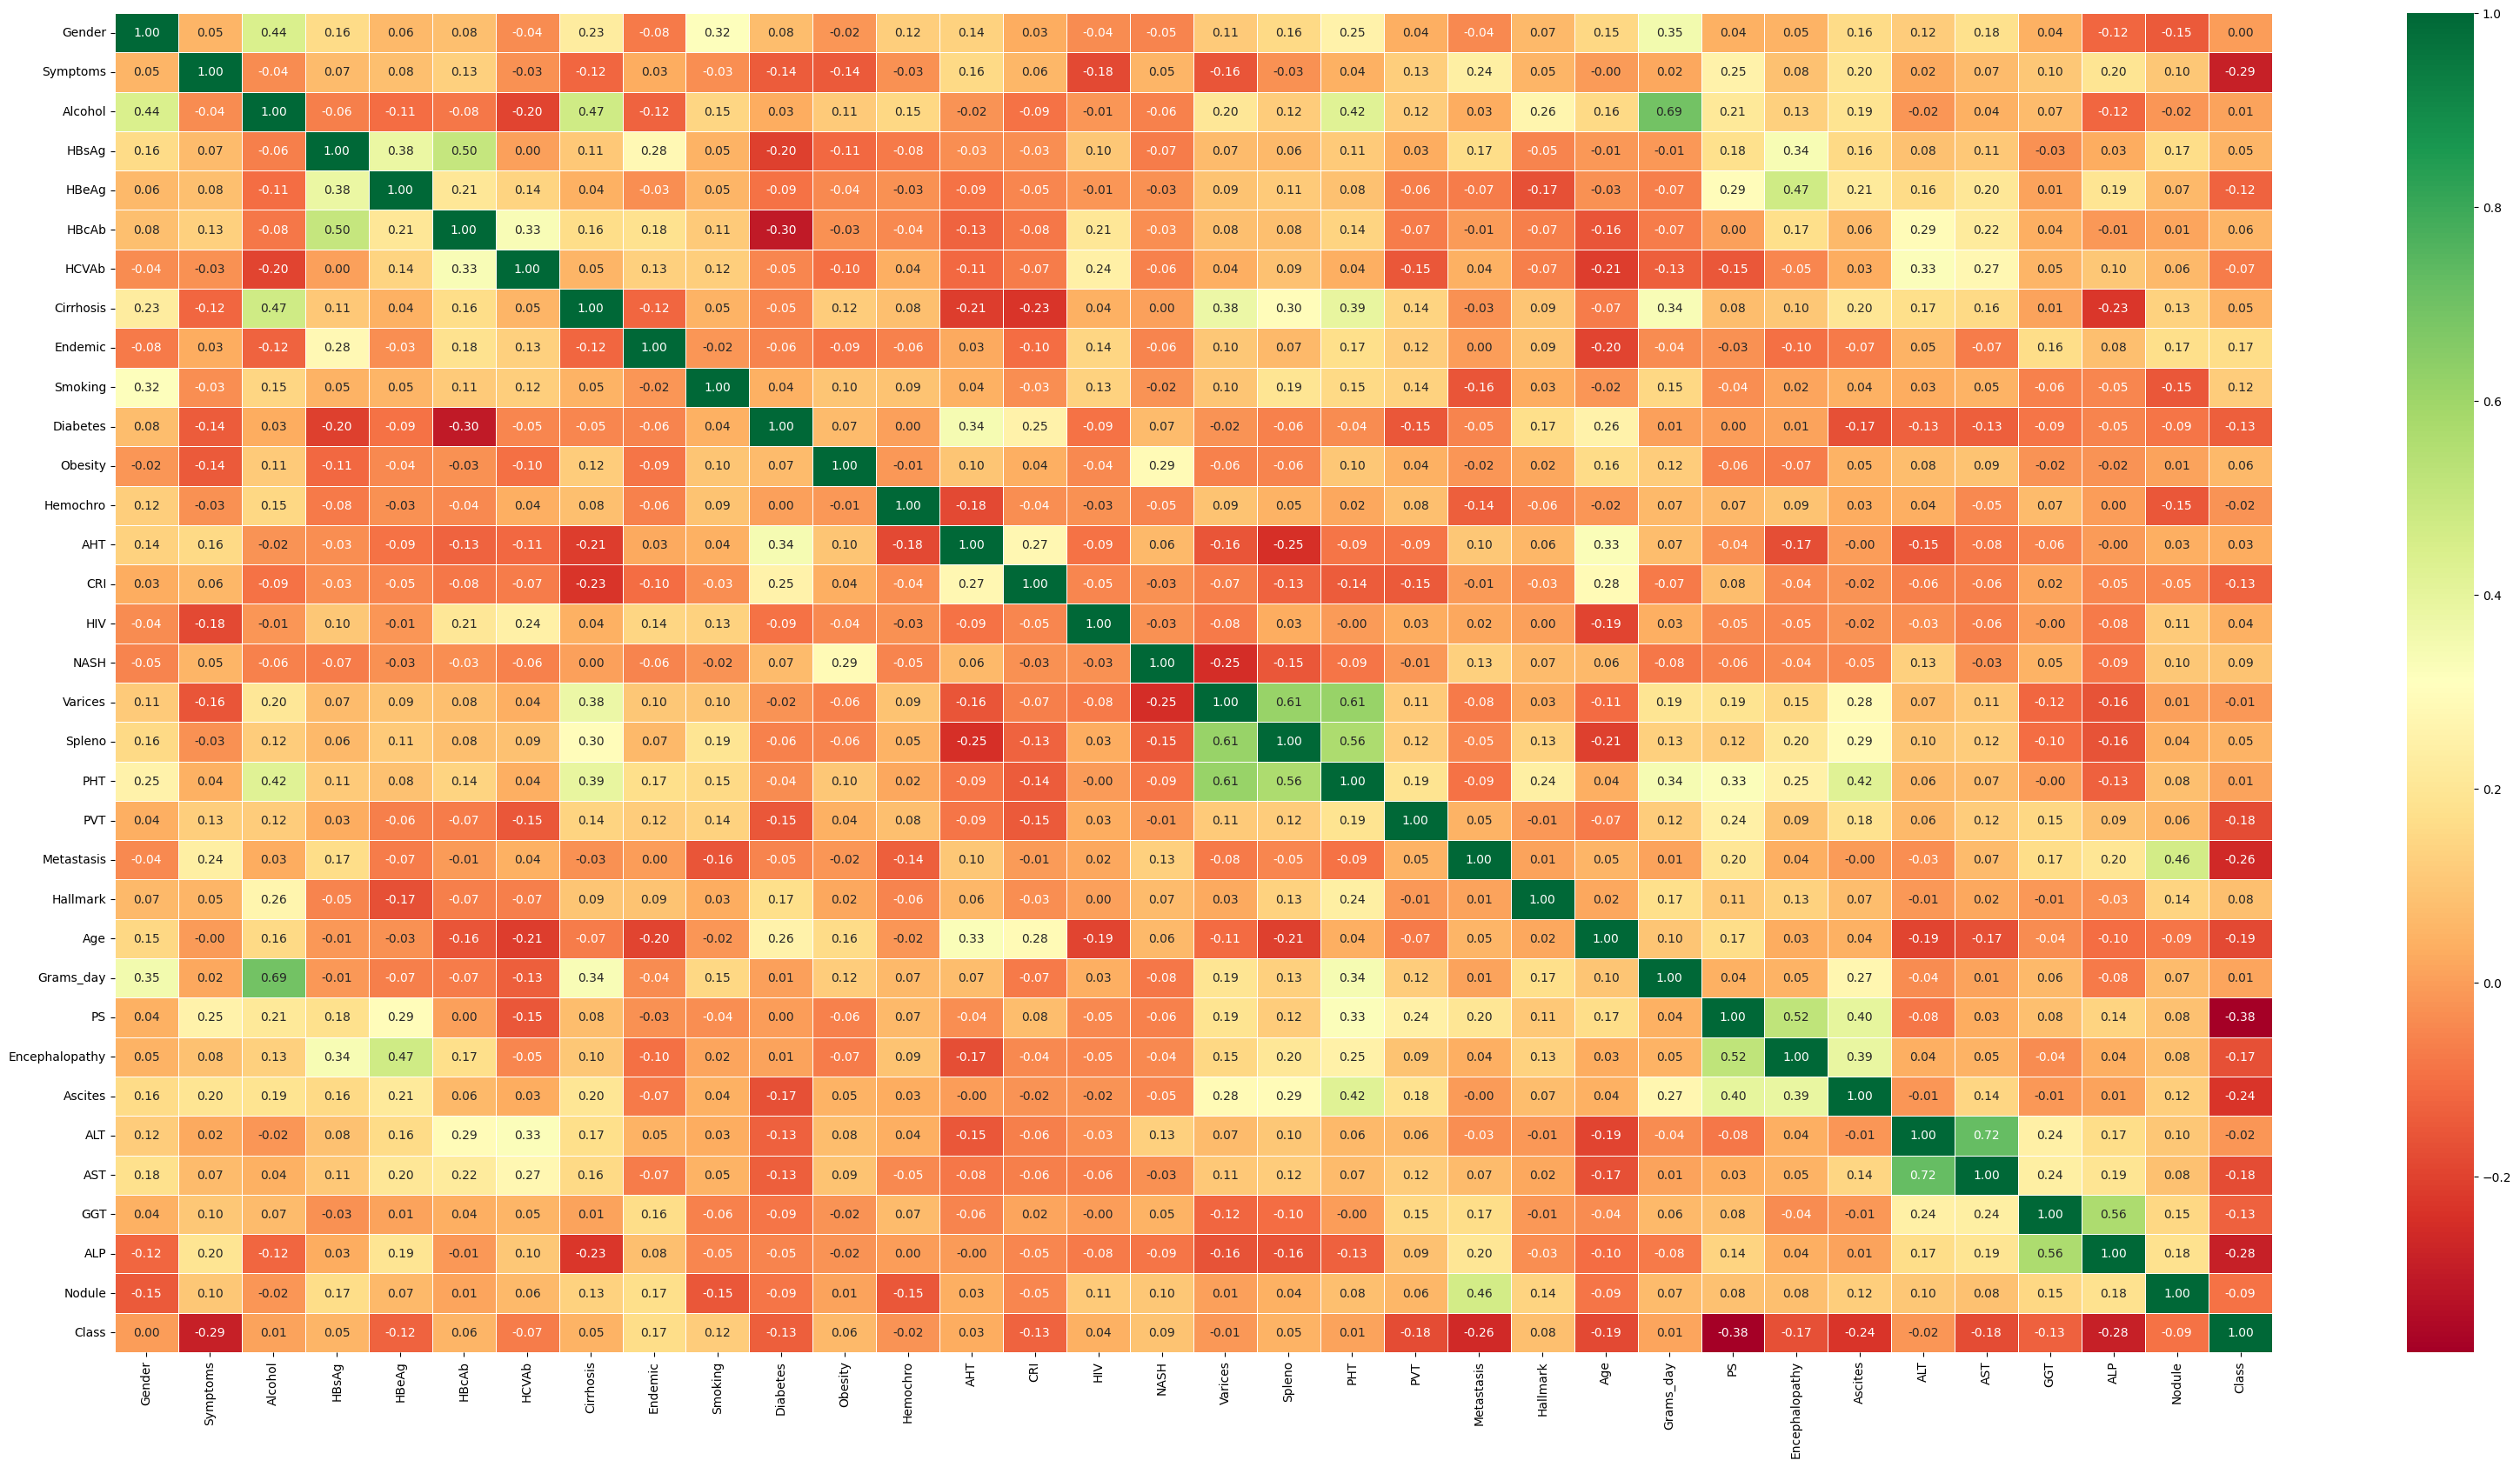

In [ ]:
corr = df.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()


In [ ]:
#convert columns to float
df['Packs_year']=df['Packs_year'].str.replace(',','.').astype(float)
df['INR'] = df['INR'].str.replace(',', '.').astype(float)
df['AFP'] = df['AFP'].str.replace(',', '.').astype(float)
df['Hemoglobin'] = df['Hemoglobin'].str.replace(',', '.').astype(float)
df['MCV'] = df['MCV'].str.replace(',', '.').astype(float)
df['Leucocytes'] = df['Leucocytes'].str.replace(',', '.').astype(float)
df['Platelets'] = df['Platelets'].str.replace(',', '.').astype(float)
df['Albumin'] = df['Albumin'].str.replace(',', '.').astype(float)
df['Total_Bil'] = df['Total_Bil'].str.replace(',', '.').astype(float)
df['TP'] = df['TP'].str.replace(',', '.').astype(float)
df['Creatinine'] = df['Creatinine'].str.replace(',', '.').astype(float)
df['Major_Dim'] = df['Major_Dim'].str.replace(',', '.').astype(float)
df['Dir_Bil'] = df['Dir_Bil'].str.replace(',', '.').astype(float)
df['Iron'] = df['Iron'].str.replace(',', '.').astype(float)
df['Sat'] = df['Sat'].str.replace(',', '.').astype(float)
df['Ferritin'] = df['Ferritin'].str.replace(',', '.').astype(float)



## <font color="green">**Visualization of differents distributions**</font>

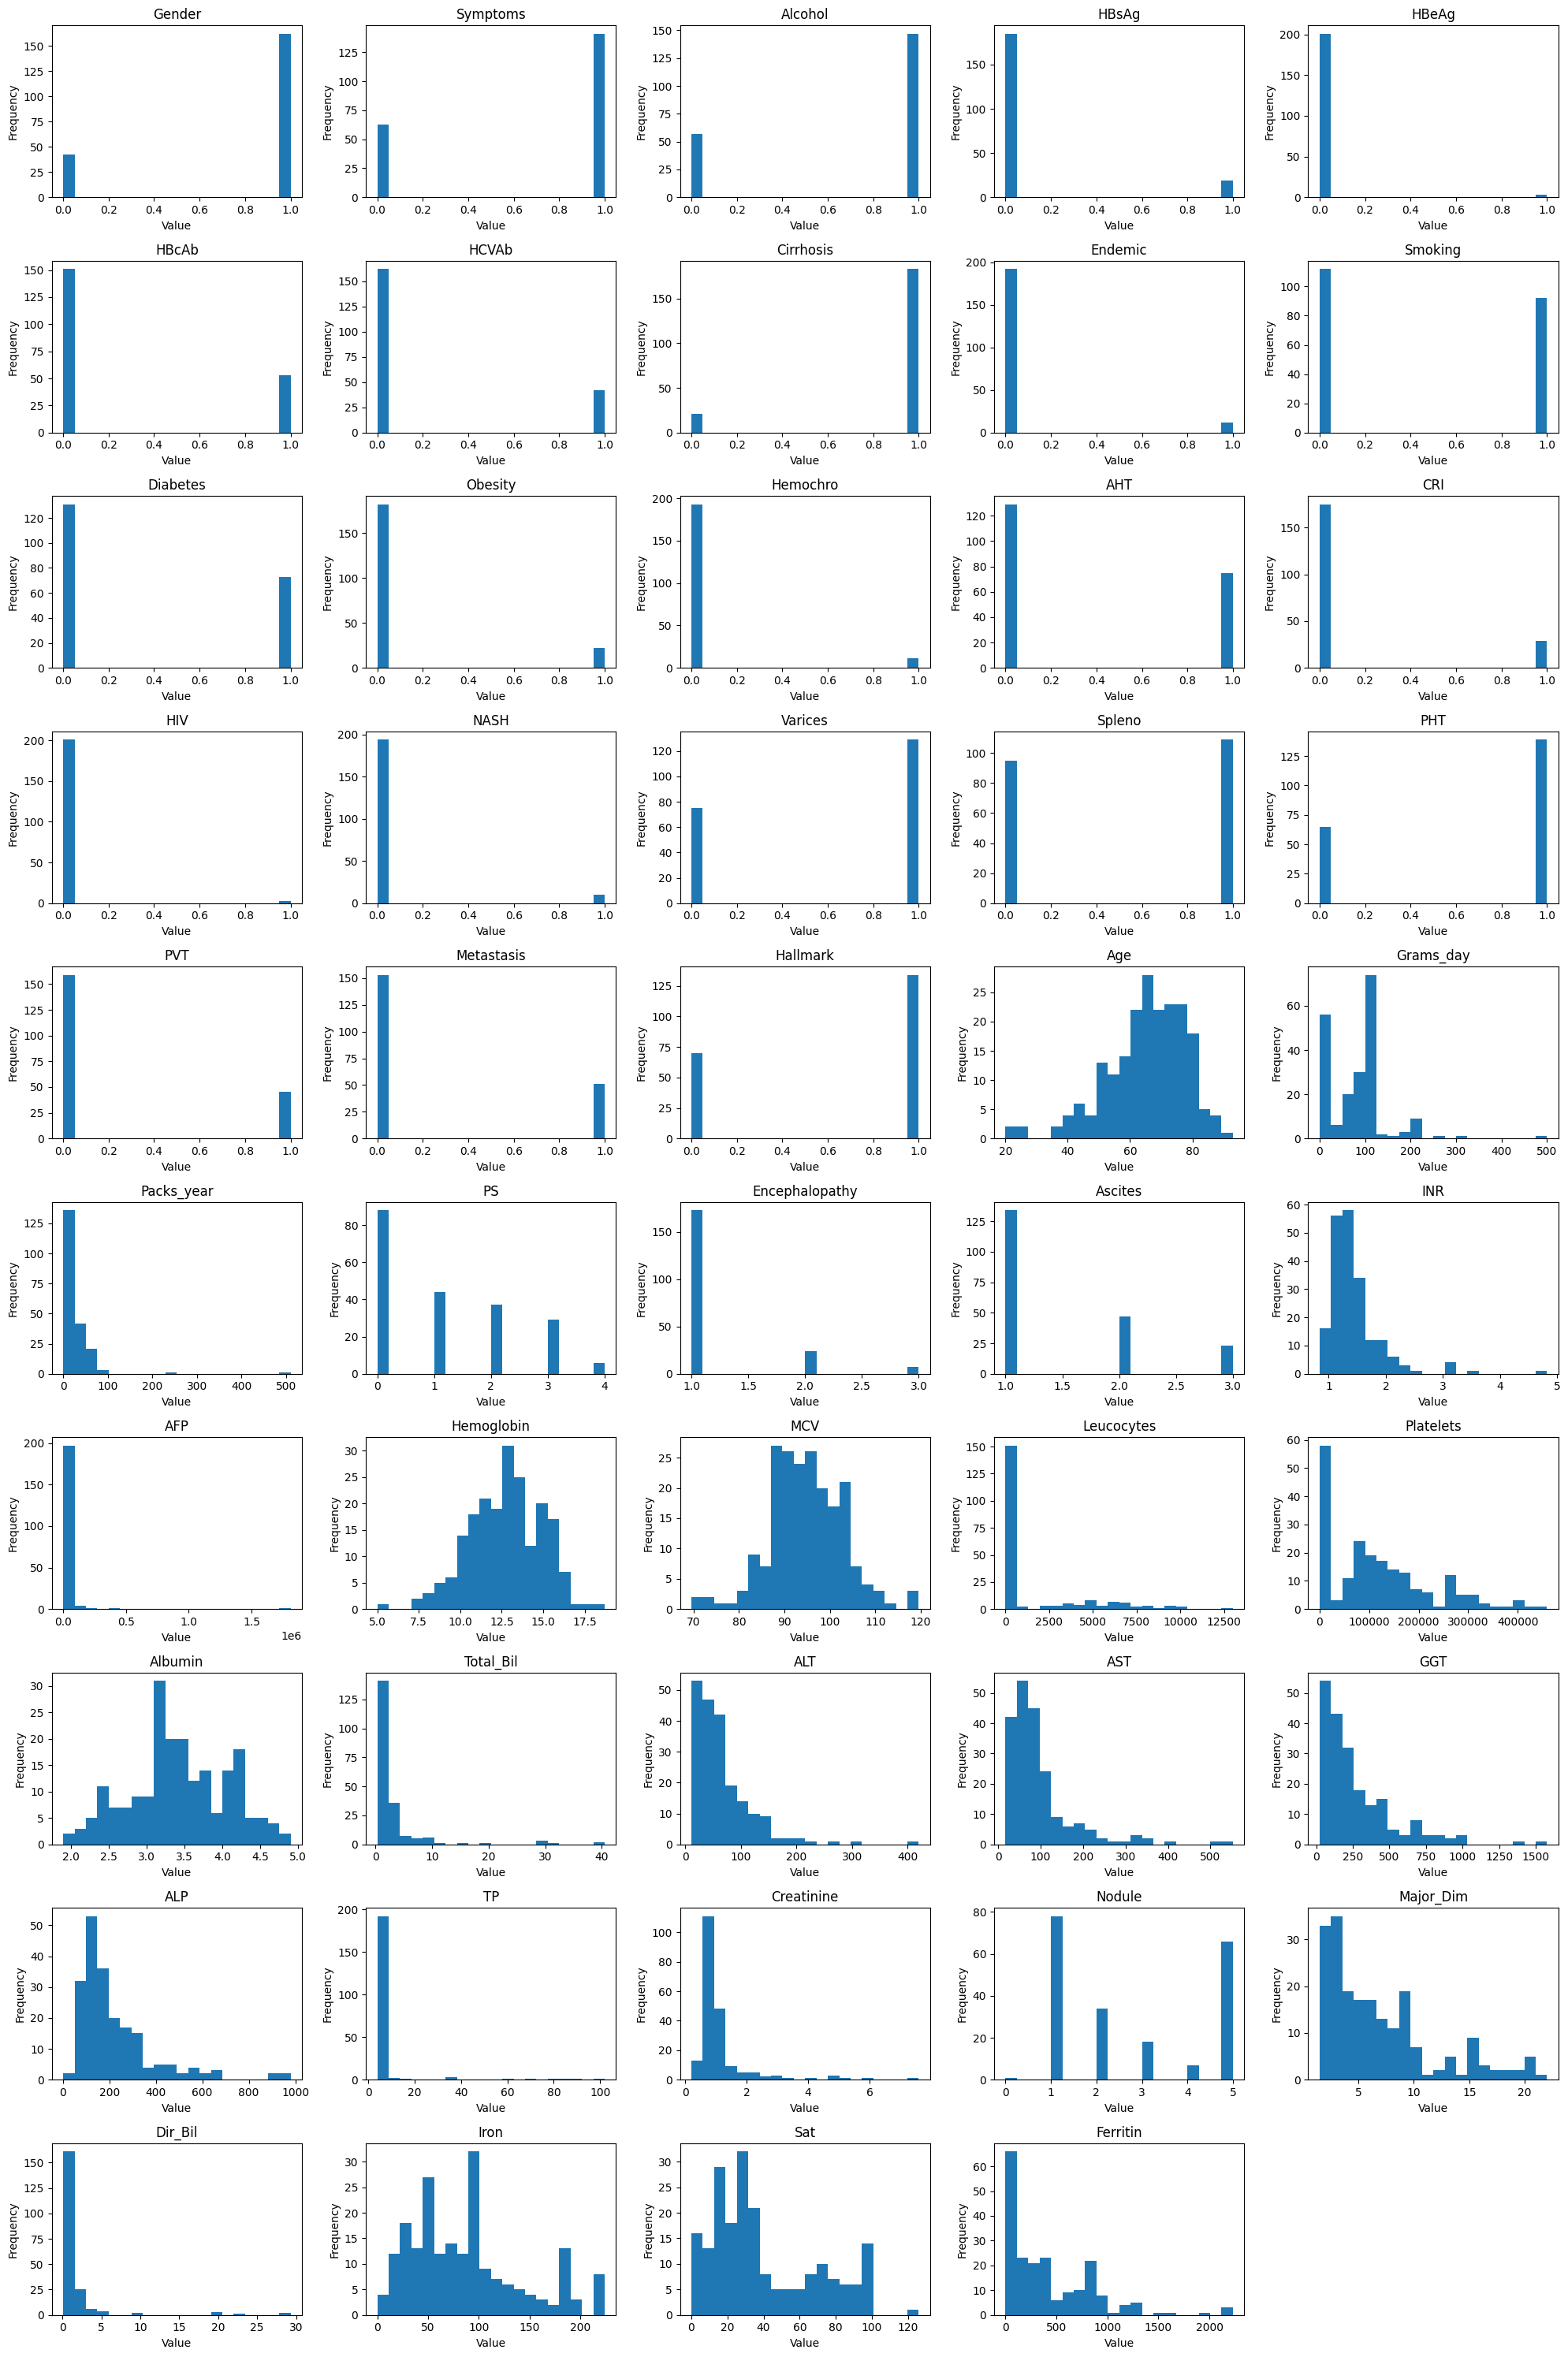

In [ ]:
# Create subplots for each feature
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(20, 30))
axs = axs.flatten()

# Loop through each feature and plot its distribution
for i, feature in enumerate(df.columns[:-1]):
    axs[i].hist(df[feature], bins=20)
    axs[i].set_title(feature)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


##<font color="green">**Hypothesis test**</font>

Let's say we want to test the hypothesis that there is a significant difference in the average age of survivors patients and those who did not. We  can use a two-sample t-test to test this hypothesis.

* H0=there is a significant difference in the average age of survivors patients and those who did not
* H1= there is no significant difference in the average age of survivors pateints and those who did not


In [ ]:
# Split the dataset into survivors_patients and died_patients
survivors_patients = data[data["Class"] == 1]["Age"]
died_patients = data[data["Class"] == 0]["Age"]

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(survivors_patients, died_patients, equal_var=False)

# Print the results of the hypothesis test
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -2.6808869649960525
p-value: 0.007952641058662734


--> The resulting t-statistic value (-2.6808869649960525) tells us how many standard errors the difference between the means is. A negative value indicates that the mean age of the survivors patients  is lower than the mean age of died patients.

The p-value (0.007952641058662734) is a measure of the statistical significance of the difference between the means. It tells us the probability of observing a difference as extreme as the one we observed, assuming that there is no difference between the two groups. In this case, the p-value is less than 0.05, which is typically used as a threshold for statistical significance, indicating that there is a significant difference between the mean age of patients who survivied and who did not 

## **<font color="green">Different Methods to select features</font>**

### **<font color="blue">Univariate and recursive feature selection using mutual information</font>**

In [ ]:
# define your target variable
target = df['Class']

# define your predictor variables
X = df.drop('Class', axis=1)

# perform univariate feature selection using mutual information
selector = SelectKBest(mutual_info_classif, k=5)
X_new = selector.fit_transform(X, target)

# perform recursive feature elimination with cross-validation
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
X_new = rfecv.fit_transform(X, target)

# print the selected features
print(X.columns[selector.get_support(indices=True)])
print(X.columns[rfecv.get_support(indices=True)])



Index(['AFP', 'MCV', 'Albumin', 'Iron', 'Ferritin'], dtype='object')
Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBcAb', 'HCVAb', 'Cirrhosis',
       'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI',
       'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark',
       'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites',
       'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin',
       'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodule',
       'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin'],
      dtype='object')


### **<font color="blue">Forward Selection</font>**

In [ ]:
# define your target variable
target = df['Class']

# define your predictor variables
X = df.drop('Class', axis=1)

# perform forward selection
clf = LogisticRegression(solver='liblinear')
fs_forward = SequentialFeatureSelector(clf, direction='forward', scoring='accuracy', cv=5)
fs_forward.fit(X, target)
selected_features_forward = X.columns[fs_forward.get_support()]
print(selected_features_forward)




/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Index(['Gender', 'Symptoms', 'HBeAg', 'HBcAb', 'Cirrhosis', 'Endemic',
       'Obesity', 'Hemochro', 'AHT', 'HIV', 'NASH', 'Varices', 'Age',
       'Grams_day', 'Packs_year', 'Encephalopathy', 'Hemoglobin', 'ALT', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Major_Dim', 'Iron'],
      dtype='object')


###<font color="blue"> **Backward with NB method**</font>

In [ ]:
# define your target variable
target = df['Class']

# define your feature variables
X = df.drop(['Class'], axis=1)

# backward elimination
clf = GaussianNB()
fs_backward = SequentialFeatureSelector(clf, direction='backward', scoring='accuracy', cv=5)
fs_backward.fit(X, target)
selected_features_backward = X.columns[list(fs_backward.support_)]

print(selected_features_backward)


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Index(['Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'INR', 'AFP', 'Hemoglobin', 'Leucocytes', 'Platelets',
       'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim',
       'Dir_Bil', 'Iron', 'Sat', 'Ferritin'],
      dtype='object')


## <font color='green'> **Evaluate the diffrents feature selection methods** </font>

In [ ]:
# define your target variable
target = df['Class']

# define your feature variables
X = df.drop(['Class'], axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# create a dictionary to store the selected features for each method
selected_features = {}

# perform univariate feature selection using mutual information
selector = SelectKBest(mutual_info_classif, k=5)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)
selected_features['univariate'] = X.columns[selector.get_support(indices=True)]

# perform recursive feature elimination with cross-validation
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
X_train_new = rfecv.fit_transform(X_train, y_train)
X_test_new = rfecv.transform(X_test)
selected_features['recursive'] = X.columns[rfecv.get_support(indices=True)]

# perform forward selection
clf = LogisticRegression(solver='liblinear')
fs_forward = SequentialFeatureSelector(clf, direction='forward', scoring='accuracy', cv=5)
fs_forward.fit(X_train, y_train)
X_train_new = X_train[selected_features_forward]
X_test_new = X_test[selected_features_forward]
selected_features['forward'] = selected_features_forward

# backward elimination
clf = GaussianNB()
fs_backward = SequentialFeatureSelector(clf, direction='backward', scoring='accuracy', cv=5)
fs_backward.fit(X_train, y_train)
X_train_new = X_train[selected_features_backward]
X_test_new = X_test[selected_features_backward]
selected_features['backward'] = selected_features_backward

# train a classifier on the selected features and evaluate its performance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = {}
for method in selected_features:
    X_train_new = X_train[selected_features[method]]
    X_test_new = X_test[selected_features[method]]
    clf.fit(X_train_new, y_train)
    y_pred = clf.predict(X_test_new)
    scores[method] = accuracy_score(y_test, y_pred)

# print the accuracy scores for each method
print(scores)


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


{'univariate': 0.6774193548387096, 'recursive': 0.7096774193548387, 'forward': 0.6451612903225806, 'backward': 0.7258064516129032}


* Based on the results of the four feature selection methods, the backward elimination method has the highest accuracy score of 0.7258, followed by recursive feature elimination with cross-validation with an accuracy score of 0.7097. The univariate and forward selection methods have lower accuracy scores of 0.6613 and 0.6452, respectively.

--> Therefore, the backward elimination method is the best feature selection method among the four methods.

## <font color="green">**Scaling**</font>

* we can perform scaling on the dataset to normalize the values of the features because due to the result of the descrie summary we notice the variables's distrubutions vary widely

In [ ]:
from sklearn.preprocessing import StandardScaler

# select the columns for scaling
selected_cols = ['Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'INR', 'AFP', 'Hemoglobin', 'Leucocytes', 'Platelets', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

# initialize the scaler
scaler = StandardScaler()

# fit and transform the selected columns
df[selected_cols] = scaler.fit_transform(df[selected_cols])



In [ ]:
df[selected_cols]

,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,INR,AFP,Hemoglobin,...,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
0,-0.577350,0.722764,0.115368,0.979050,-0.145470,-0.938375,-0.396955,0.178727,-0.120701,0.452769,...,-0.352266,-0.422567,-0.183792,-0.461648,-1.002113,-0.702832,-0.310458,-0.632454,-0.102464,0.957609
1,-0.577350,0.722764,-0.276883,-1.194646,-0.485790,-0.938375,-0.396955,-0.423682,-0.121408,-1.111177,...,-0.774469,-0.600674,-0.191449,-0.588186,-1.002113,-1.055468,-0.222874,-1.003364,-1.040800,-0.949676
2,1.732051,0.722764,0.978320,-0.401326,0.648610,0.733490,-0.396955,-1.005319,-0.121383,-1.755155,...,-0.276588,-0.665980,-0.191449,1.014632,1.307843,1.267781,-0.410555,-1.075736,-1.179813,-0.954228
3,1.732051,0.722764,0.899870,-0.559990,0.194850,-0.938375,-0.396955,-1.026091,-0.102772,0.314773,...,-0.706757,-0.280082,-0.107228,-0.029309,-0.424624,1.827850,-0.385530,0.787860,1.322417,2.004567
4,-0.577350,0.722764,0.821420,0.391993,0.194850,-0.938375,-0.396955,-1.046864,-0.121053,0.728759,...,-0.392096,-0.665980,-0.199105,0.698287,-1.002113,0.438050,-0.410555,-0.514848,-0.867034,-0.940572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-0.577350,-1.383577,0.350719,-0.924917,-0.326974,-0.938375,-0.396955,-0.236728,-0.117585,-0.743190,...,0.468243,-0.618485,-0.191449,4.336262,-0.424624,0.396563,-0.097753,-0.256116,0.210315,0.996301
200,-0.577350,0.722764,1.135221,0.503058,-0.190846,1.569422,1.734066,-0.195182,-0.103432,-0.237207,...,-0.169045,0.058321,-0.229731,-0.377289,-0.424624,0.147643,-0.175328,-0.328489,-0.589009,-0.831324
201,-0.577350,0.722764,1.135221,0.169864,-0.485790,1.569422,-0.396955,0.220272,-0.121249,-1.157176,...,0.786887,0.491715,-0.191449,-0.071488,-1.002113,1.060348,-0.042700,-0.294112,-0.380489,-0.749389
202,1.732051,0.722764,0.664519,0.772787,-0.485790,1.569422,1.734066,-0.236728,-0.121381,0.130780,...,-0.272605,-0.143533,-0.176136,-0.060943,1.307843,-0.806548,-0.277927,0.125650,1.496183,0.964437


In [ ]:
# Convert the 'Class' column from integer to categorical
df['Class'] = df['Class'].astype('category')

In [ ]:
print(df['Class'].dtype)

category


In [ ]:
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,-0.422567,-0.183792,-0.461648,-1.002113,-0.702832,-0.310458,-0.632454,-0.102464,0.957609,1
1,0,0,0,0,0,0,1,1,0,1,...,-0.600674,-0.191449,-0.588186,-1.002113,-1.055468,-0.222874,-1.003364,-1.040800,-0.949676,1
2,1,0,1,1,0,1,0,1,0,1,...,-0.665980,-0.191449,1.014632,1.307843,1.267781,-0.410555,-1.075736,-1.179813,-0.954228,1
3,1,1,1,0,0,0,0,1,0,1,...,-0.280082,-0.107228,-0.029309,-0.424624,1.827850,-0.385530,0.787860,1.322417,2.004567,0
4,1,1,1,1,0,1,0,1,0,1,...,-0.665980,-0.199105,0.698287,-1.002113,0.438050,-0.410555,-0.514848,-0.867034,-0.940572,1


# <font color="red">**Classification Algorithms:**</font>



##<font color="green">**Logistic Regression**</font>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df[selected_cols] # Features# Features
y = df['Class'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print training and testing set scores
print("Training set score: {:.3f}".format(lr_model.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(lr_model.score(X_test, y_test)))



Accuracy: 0.7580645161290323
Precision: 0.72
Recall: 0.6923076923076923
F1 Score: 0.7058823529411765
Training set score: 0.817
Testing set score: 0.758


--> The accuracy of the model is 0.758, which means that 75.8% of the predictions made by the model were correct. The precision is 0.72, which means that when the model predicts a positive class, it is correct 72.0% of the time. The recall is 0.692, which means that the model correctly identified 65.4% of the actual positive samples. The F1 score, which is a harmonic mean of precision and recall, is 0.70.

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

## <font color="green">**Naive Bayes**</font>

In [ ]:
from sklearn.naive_bayes import GaussianNB
X = df[selected_cols] # Features
y = df['Class'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training set score:", nb_model.score(X_train, y_train))
print("Testing set score:", nb_model.score(X_test, y_test))


Accuracy: 0.6774193548387096
Precision: 0.6071428571428571
Recall: 0.6538461538461539
F1 Score: 0.6296296296296297
Training set score: 0.7746478873239436
Testing set score: 0.6774193548387096


In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1])

## <font color="green">**k-Nearest Neighbors (k-NN)**</font>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X = df[selected_cols]
y = df['Class'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the k-NN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training set score:", knn_model.score(X_train, y_train))
print("Testing set score:", knn_model.score(X_test, y_test))


Accuracy: 0.6935483870967742
Precision: 0.6521739130434783
Recall: 0.5769230769230769
F1 Score: 0.6122448979591837
Training set score: 0.8732394366197183
Testing set score: 0.6935483870967742


In [ ]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

## <font color="green">**Decision Tree**</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = df[selected_cols] # Features
y = df['Class'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the training and testing set scores
print("Training set score:", dt_model.score(X_train, y_train))
print("Testing set score:", dt_model.score(X_test, y_test))


Accuracy: 0.6774193548387096
Precision: 0.6
Recall: 0.6923076923076923
F1 Score: 0.6428571428571429
Training set score: 1.0
Testing set score: 0.6774193548387096


The F1 score is a commonly used metric in machine learning for evaluating the performance of a binary classification model. It is the harmonic mean of precision and recal

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

## <font color="green">**Raindom Forest**</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df[selected_cols] # Features
y = df['Class'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training set score:", rf_model.score(X_train, y_train))
print("Testing set score:", rf_model.score(X_test, y_test))


Accuracy: 0.7258064516129032
Precision: 0.6956521739130435
Recall: 0.6153846153846154
F1 Score: 0.6530612244897959
Training set score: 1.0
Testing set score: 0.7258064516129032


In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

## <font color="green">**Support Vector Machines SVM**</font>

In [ ]:
from sklearn.svm import SVC
X = df[selected_cols] # Features
y = df['Class'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
train_score = svm_model.score(X_train, y_train)
print("Training set score:", train_score)

# Calculate the testing set score
test_score = svm_model.score(X_test, y_test)
print("Testing set score:", test_score)


Accuracy: 0.7580645161290323
Precision: 0.72
Recall: 0.6923076923076923
F1 Score: 0.7058823529411765
Training set score: 0.8380281690140845
Testing set score: 0.7580645161290323


In [ ]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

## <font color="green">**Gradient Boosting Machines (GBM)**</font>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X = df[selected_cols] # Features
y = df['Class'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier()

# Train the model on the training set
gbm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gbm_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1_score = f1_score(y_test, y_pred)
print("F1 Score:", f1_score)
training_score = gbm_model.score(X_train, y_train)
print("Training set score: %f" % training_score)
testing_score = gbm_model.score(X_test, y_test)
print("Testing set score: %f" % testing_score)


Accuracy: 0.7741935483870968
Precision: 0.75
Recall: 0.6923076923076923
F1 Score: 0.7199999999999999
Training set score: 1.000000
Testing set score: 0.774194


In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

# <font color="red">**Comparaison of different models**</font>

--> It seems that the GBM algorithm and SVM have the highest accuracy, precision, recall, and F1 score among the six algorithms. However, the difference in performance between the two is very small. In terms of training set score, GBM has the highest score of 1.0, indicating that the model is perfectly fit to the training data. SVM has the second-highest training set score of 0.838, indicating that the model is well fit to the training data. The other four algorithms have a lower training set score than GBM and SVM, which suggests that they might be underfitting the training data.
As for the testing set score, GBM and SVM have the highest score of 0.758, followed by logistic regression with a score of 0.725. The other three algorithms have a lower testing set score than GBM, SVM, and logistic regression.

#<font color="red"> **Clustering Algorithms**</font>

## <font color="green">**K-Means Clustering**</font>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Features
X = df[selected_cols]
# Initialize the KMeans model with 4 clusters
kmeans_model = KMeans(n_clusters=4)

# Fit the model to the data
kmeans_model.fit(X)
labels = kmeans_model.labels_

# Get the clustering evaluation metrics
silhouette_avg = silhouette_score(X, kmeans_model.labels_)
davies_bouldin_score_avg = davies_bouldin_score(X, kmeans_model.labels_)
calinski_harabasz_score_avg = calinski_harabasz_score(X, kmeans_model.labels_)

print("The average silhouette score is :", silhouette_avg)
print("The average Davies-Bouldin score is :", davies_bouldin_score_avg)





The average silhouette score is : 0.07998029452525358
The average Davies-Bouldin score is : 2.356145230021482


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 3, 1, 2, 0, 2, 2, 1,
       2, 0, 1, 1, 2, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 0, 2,
       0, 1, 2, 2, 2, 2], dtype=int32)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


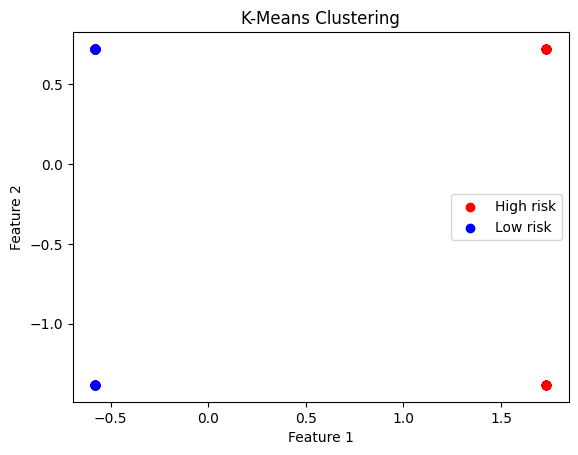

In [ ]:
X = df[selected_cols]# Features
y = df['Class'] # Target variable

# Perform K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Assign labels to clusters based on the majority class in each cluster
if sum(y[y_pred==0])/len(y[y_pred==0]) > 0.5:
    label1 = "Low risk"
    label2 = "High risk"
else:
    label1 = "High risk"
    label2 = "Low risk"

# Plot the data points with different colors and labels for different clusters
plt.scatter(X.iloc[y_pred == 0, 0], X.iloc[y_pred == 0, 1], c='red', label=label1)
plt.scatter(X.iloc[y_pred == 1, 0], X.iloc[y_pred == 1, 1], c='blue', label=label2)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## <font color="green">**Hierarchical Clustering**</font>

The average silhouette score is : 0.2182302490449571


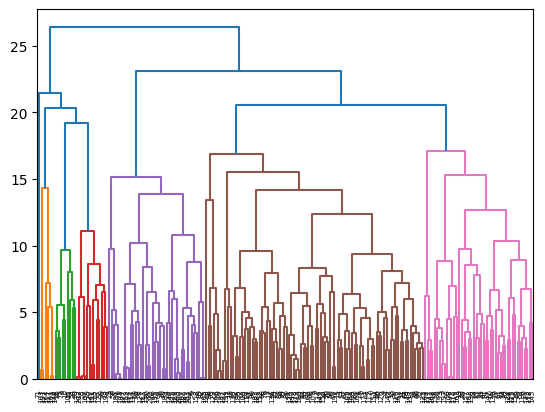

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
X = df[selected_cols] # Features

# Calculate the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram to determine the optimal number of clusters
dendrogram(Z)

# Initialize the hierarchical clustering model with 2 clusters
hc_model = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Fit the model to the data
hc_model.fit(X)

# Get the cluster labels for each data point
labels = hc_model.labels_
# Get the clustering evaluation metrics
silhouette_avg = silhouette_score(X, hc_model.labels_)
davies_bouldin_score_avg = davies_bouldin_score(X, hc_model.labels_)
calinski_harabasz_score_avg = calinski_harabasz_score(X, hc_model.labels_)

print("The average silhouette score is :", silhouette_avg)




##<font color="green"> **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**</font>

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
X = df[selected_cols]# Features

# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize the DBSCAN model with epsilon=0.5 and minimum samples=5
dbscan_model = DBSCAN(eps=0.5, min_samples=7)

# Fit the model to the data
dbscan_model.fit(X)
silhouette_avg = silhouette_score(X, hc_model.labels_)
davies_bouldin_score_avg = davies_bouldin_score(X, hc_model.labels_)
calinski_harabasz_score_avg = calinski_harabasz_score(X, hc_model.labels_)

# Get the cluster labels for each data point
labels = dbscan_model.labels_




In [ ]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

The average silhouette score is : 0.2761483340277431


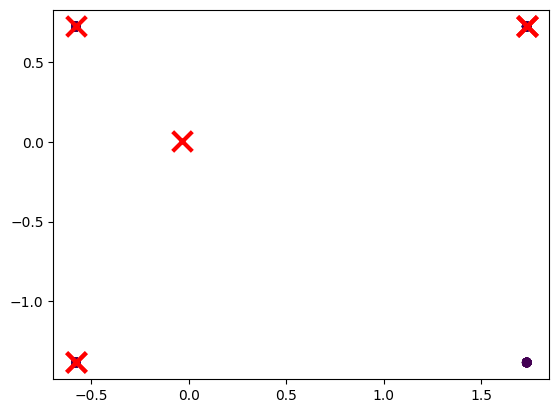

In [ ]:
from sklearn.cluster import MeanShift

X = df[selected_cols] # Features

# Initialize the MeanShift model
meanshift_model = MeanShift()

# Fit the model to the data
meanshift_model.fit(X)

# Get the cluster labels for each data point
labels = meanshift_model.labels_

# Get the cluster centers
cluster_centers = meanshift_model.cluster_centers_
silhouette_avg = silhouette_score(X, meanshift_model.labels_)
print("The average silhouette score is :", silhouette_avg)


# Plot the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()


## <font color="green">**Mean-shift Clustering**</font>

It works by shifting data points towards centroids to be the mean of other points in the region.

In [ ]:

from sklearn.cluster import MeanShift
X = df[selected_cols] # Features

# Initialize the mean-shift model with bandwidth=0.5
ms_model = MeanShift(bandwidth=0.5)

# Fit the model to the data
ms_model.fit(X)

# Get the cluster labels for each data point
labels = ms_model.labels_




In [ ]:
labels

array([ 95, 109,   7,   8,  64,  70, 138, 114, 135, 190, 143,  74, 169,
       128, 105, 142,  82,  25, 102,  69, 162, 157,  98,  21,  35,  56,
       140, 121, 113, 145, 117, 107,  96,  62, 181,  38,  78,  53,  89,
        26,  88, 171,  34,  84, 132, 116, 141,  43, 150, 183,  32,  40,
       156, 136, 134,   3,  55,  99,  81, 146,  68, 125,  92,  80, 170,
        49,  93, 106,  13,  50, 144,  27,  36,  18, 112, 111,   0,  59,
        28, 189,  11, 124, 172,  54, 123, 119,  14, 131,  73, 110,  41,
       100,   6,  16,  51, 154,  85, 120, 158,  77,  33,   4, 104, 177,
       173,  97, 137,  58,   1, 179,   9, 126,  72,  44, 115, 186, 184,
       175, 176, 151, 178, 118,  46,  76, 180,  65,  79,  66, 160,  63,
        39, 129, 161,   2, 139,  15, 127,  60, 130,  67, 191, 163, 168,
       167, 133, 149, 152,  71, 148, 195, 194,  91,  30,  52, 193, 103,
        47, 108,  87,  23, 192,  94, 101,  31,  29,   6, 155,   3, 159,
        83,   4,  61,   1, 153, 166, 122,  90,  24, 188, 187, 18


# **<p style="text-align: center;">Thank you for your attention!</p>**
